In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


# Download and load the MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

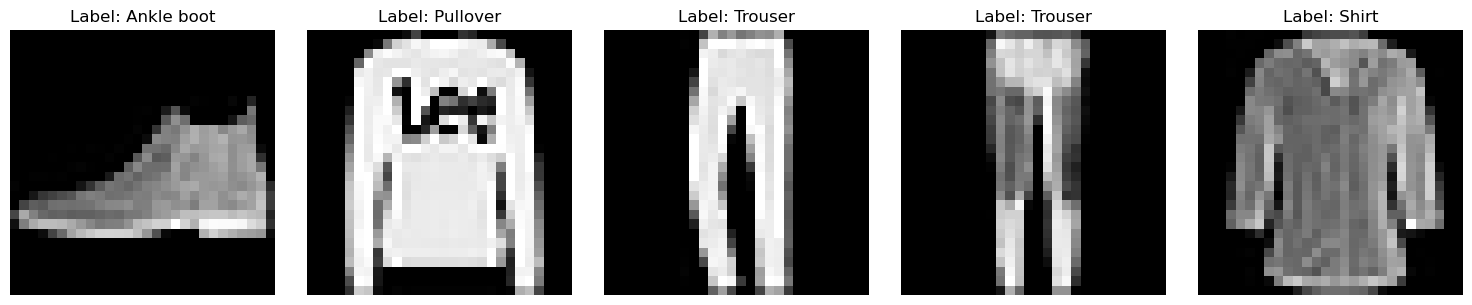

In [2]:
#Class names coded for the fasion dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the images with their labels and predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {class_names[y_test[i]]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
# Define the CNN model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

Epoch 1/3


c:\Users\navan\anaconda3\envs\testbed_69\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 27s 13ms/step - loss: 0.4612 - accuracy: 0.8336 - val_loss: 0.3573 - val_accuracy: 0.8716
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3150 - accuracy: 0.8850 - val_loss: 0.3016 - val_accuracy: 0.8918
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2704 - accuracy: 0.8997 - val_loss: 0.2920 - val_accuracy: 0.8942


In [5]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

313/313 [==============================] - 2s 7ms/step - loss: 0.2920 - accuracy: 0.8942
Test Loss: 0.2919597923755646
Test Accuracy: 0.8942000269889832


1/1 [==============================] - 0s 129ms/step


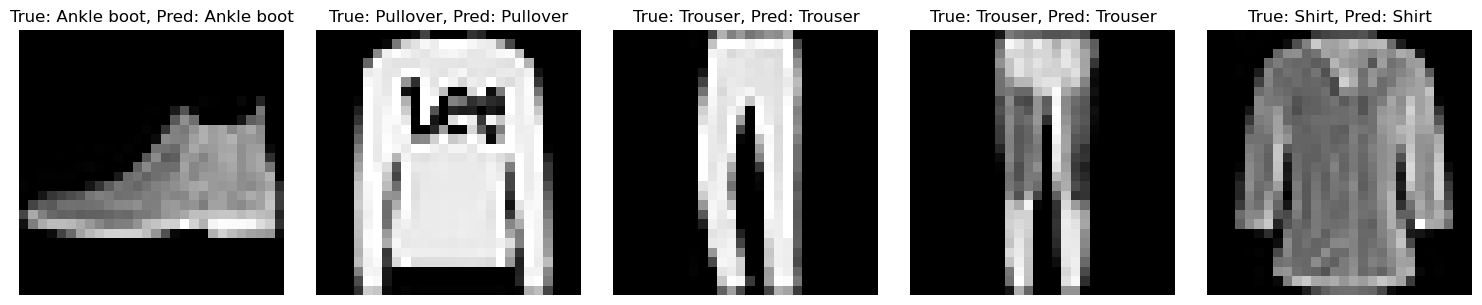

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get the model predictions for the first 5 x_test samples
predictions = model.predict(x_test[:5])

# Plot the images with their labels and predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {class_names[y_test[i]]}, Pred: {class_names[predictions[i].argmax()]}")
    ax.axis('off')

plt.tight_layout()
plt.show()
